## Final Project Submission

Please fill out:
* Student name: Elliot Evins
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
#Import Modules

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

In [4]:
#Import data and look for data features with incorrect encoding

In [5]:
df = pd.read_csv('../CSVs/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
duplicate_rows = df[df.duplicated()]
print(f"The are {len(duplicate_rows)} duplicate rows")

The are 0 duplicate rows


In [8]:
duplicate_id = df[df.duplicated('id')]
print(f'There are {len(duplicate_id)} duplicate values of id, ' 
      f'which represent {round(len(duplicate_id)/len(df),3)}% of all entries.')

There are 177 duplicate values of id, which represent 0.008% of all entries.


In [9]:
for col in df:
    v = df[col].isna().sum()
    if v > 0:
        print(f'{col} has {v} missing values.')

waterfront has 2376 missing values.
view has 63 missing values.
yr_renovated has 3842 missing values.


Since we have access to the original data, I believe in this case we'll want to deal with missing values before we convert datatypes. We'll start by importing a new CSV and seeing if we can merge the missing values. 

We'll want to convert date to datetime; sqft_basement and yr_renovated to integer; waterfront and view to categorical str; and grade and condition to ordinal str. 

In [10]:
# Remove characters from sqft_basement and convert to float, then integer
df.sqft_basement = df.sqft_basement.str.replace('?', '0')
df.sqft_basement = df.sqft_basement.str.replace('0.0', '0')
df.sqft_basement = df.sqft_basement.astype('float')

In [11]:
# Convert yr_renovated to integer
df.yr_renovated = df.yr_renovated.fillna(0)
df.yr_renovated = df.yr_renovated.astype('int64')
df.yr_renovated = df.yr_renovated.replace(0, np.nan)

In [12]:
# Convert waterfront and view to strings
df.waterfront = df.waterfront.fillna(9)
df.waterfront = df.waterfront.astype('int64')
df.waterfront = df.waterfront.replace(9, np.nan)
df.waterfront.unique()

array([nan,  0.,  1.])

In [13]:
df.view = df.view.fillna(9)
df.view = df.view.astype('int64')
df.view = df.view.replace(9, np.nan)
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     744 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [15]:
df2=pd.read_csv('../CSVs/full_kc.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [16]:
df = pd.merge(df.id, df2, how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21953 entries, 0 to 21952
Data columns (total 21 columns):
id               21953 non-null int64
date             21953 non-null object
price            21953 non-null float64
bedrooms         21953 non-null int64
bathrooms        21953 non-null float64
sqft_living      21953 non-null int64
sqft_lot         21953 non-null int64
floors           21953 non-null float64
waterfront       21953 non-null int64
view             21953 non-null int64
condition        21953 non-null int64
grade            21953 non-null int64
sqft_above       21953 non-null int64
sqft_basement    21953 non-null int64
yr_built         21953 non-null int64
yr_renovated     21953 non-null int64
zipcode          21953 non-null int64
lat              21953 non-null float64
long             21953 non-null float64
sqft_living15    21953 non-null int64
sqft_lot15       21953 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.7+ MB


In [17]:
duplicate_id = df[df.duplicated('id')]
print(f'There are {len(duplicate_id)} duplicate values of id, ' 
      f'which represent {round(len(duplicate_id)/len(df),3)}% of all entries.')

There are 533 duplicate values of id, which represent 0.024% of all entries.


Data is cleaned - let's export it as a CSV and put it all into a model to see what out baseline is...

In [18]:
df.to_csv('clean_kc.csv', index = False)

### As expected, there are quite a few categorical variables so for these we might be able to gain some information from boxplots

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

outcome = 'price'
x_cols = df.drop(['price','date','zipcode','id'], axis=1).columns
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.696      
Dependent Variable:        price                  AIC:                      598700.3202
Date:                      2020-07-26 12:21       BIC:                      598836.2634
No. Observations:          21953                  Log-Likelihood:           -2.9933e+05
Df Model:                  16                     F-statistic:              3137.      
Df Residuals:              21936                  Prob (F-statistic):       0.00       
R-squared:                 0.696                  Scale:                    4.0854e+10 
---------------------------------------------------------------------------------------
                  Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------
Intercept     -36953497.4298 1582529.9785 -23.3509 0.0000 -40055370.3443 -33851624.5152
bedrooms         -33624.6656    1885.5297 -17.8330 0.0000    -37320.4398    -29928.8913
bathrooms         41244.7361    3252.2842  12.6818 0.0000     34870.0244     47619.4478
sqft_living         108.0890       2.2728  47.5571 0.0000       103.6341       112.5439
sqft_lot              0.1319       0.0481   2.7428 0.0061         0.0376         0.2261
floors              443.0138    3583.6622   0.1236 0.9016     -6581.2227      7467.2503
waterfront       588539.2301   17414.6870  33.7956 0.0000    554405.1873    622673.2728
view              49424.1404    2127.8956  23.2268 0.0000     45253.3114     53594.9693
condition         30963.1051    2316.9587  13.3637 0.0000     26421.6990     35504.5113
grade             97842.6559    2150.8403  45.4904 0.0000     93626.8536    102058.4581
sqft_above           71.0683       2.2510  31.5721 0.0000        66.6562        75.4804
sqft_basement        37.0197       2.6419  14.0126 0.0000        31.8414        42.1980
yr_built          -2455.3322      71.8545 -34.1709 0.0000     -2596.1722     -2314.4922
yr_renovated         20.9955       3.6499   5.7524 0.0000        13.8415        28.1495
lat              558707.9479   10444.2220  53.4945 0.0000    538236.5193    579179.3764
long            -118634.9387   11897.6759  -9.9713 0.0000   -141955.2418    -95314.6356
sqft_living15        27.8960       3.4313   8.1298 0.0000        21.1703        34.6217
sqft_lot15           -0.4059       0.0735  -5.5202 0.0000        -0.5501        -0.2618
---------------------------------------------------------------------------------------
Omnibus:                 18806.356         Durbin-Watson:            1.980             
Prob(Omnibus):           0.000             Jarque-Bera (JB):         1913454.621       
Skew:                    3.609             Prob(JB):                 0.000             
Kurtosis:                48.164            Condition No.:            171294126951673216
=======================================================================================
* The condition number is large (2e+17). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [22]:
y = df['price']
X = df.drop(['price','date','zipcode','id'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 42570539747.89382
Test Mean Squarred Error: 33958841030.074215


In [23]:
rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 206326.2943686379
Test Root Mean Squarred Error: 184279.24742106535


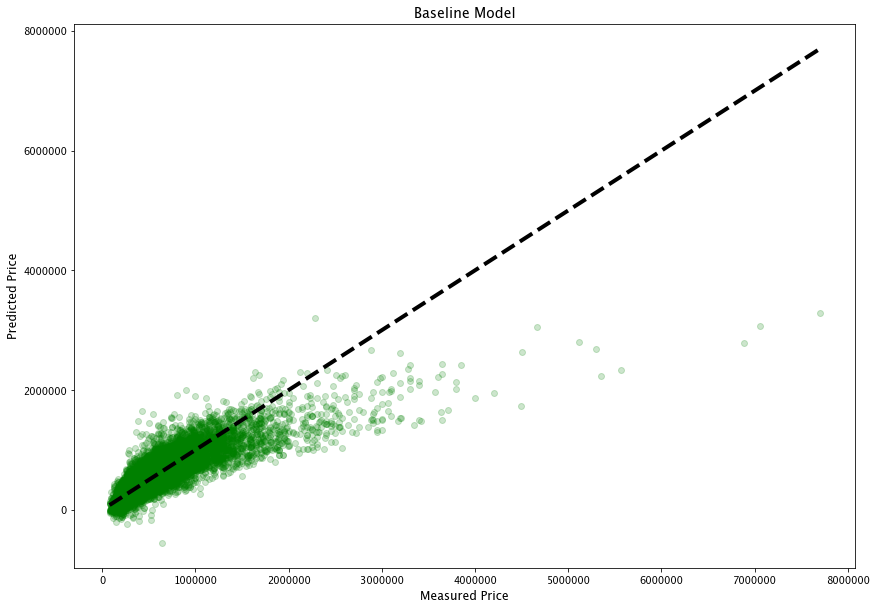

In [25]:
predicted = cross_val_predict(linreg, X, y, cv=10)

plt.figure(figsize = (14,10))
plt.scatter(y, predicted, alpha=0.2, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured Price', size=12)
plt.ylabel('Predicted Price', size=12)
plt.title("Baseline Model", size=14)
plt.show();

R-Squared value of 0.696 is a good starting point for an initial model. Let's do some more data exploration in the next notebook and see what we can improve. 